In [ ]:
# from osgeo import gdal

import numpy as np
import rasterio as rio
from rasterio.plot import show, show_hist
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
import matplotlib.colors as mcolors

-- Convert to TIFF https://gis.stackexchange.com/questions/479431/open-gdb-file-in-python 

COMMAND PROMPT 

gdal_translate -of gtiff -co tiled=yes -co compress=deflate  NVIS_V7_0_AUST_EXT.gdb NVIS_V7_0_AUST_EXT.tif
gdaladdo NVIS_V7_0_AUST_EXT.tif
gdaladdo NVIS_V7_0_AUST_EXT.tif.msk

https://www.dcceew.gov.au/environment/environment-information-australia/national-vegetation-information-system/data-products

https://www.dcceew.gov.au/sites/default/files/documents/mvg7-numeric-order.pdf

https://www.youtube.com/watch?v=Hxh7DdUtrVY&t=3702s

In [ ]:
dem_path = os.path.normpath(r"C:\Users\abbi_\NVIS7_0_AUST_EXT_MVG_ALB.tif")

with rio.open(dem_path) as src:
    band = src.read(1)

    print(band)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
output_path = os.path.normpath(r"C:\Users\abbi_\Output")

In [52]:
gdf = gpd.read_file(r"C:\Users\abbi_\Boundaries\LGA_Boundaries_LGATE_233.shp")
# gdf = gdf[gdf["abs_lga_nu"].isin(["3430"])]
gdf_fremantle = gdf[gdf["name"] == "FREMANTLE, CITY OF"]
gdf_perth = gdf[gdf["name"] == "PERTH, CITY OF"]
gdf_kalamunda = gdf[gdf["name"] == "KALAMUNDA, CITY OF"]

clipped_path = os.path.join(output_path, "clipped.tif")

In [54]:
# print(gdf_kalamunda)

In [51]:
# print(gdf.head(50))

In [5]:
with rio.open(dem_path) as src:
    if gdf_fremantle.crs != src.crs:
        gdf_fremantle = gdf_fremantle.to_crs(src.crs)

    shapes = gdf_fremantle.geometry.values
    # print(shapes)
    clipped_image, clipped_image_transform = mask(src, shapes, crop = True)

    meta = src.meta.copy()
    meta.update({
        'height' : clipped_image.shape[1],
        'width' : clipped_image.shape[2],
        'transform' : clipped_image_transform
    })

    with rio.open(clipped_path, "w", **meta) as dst:
        dst.write(clipped_image)

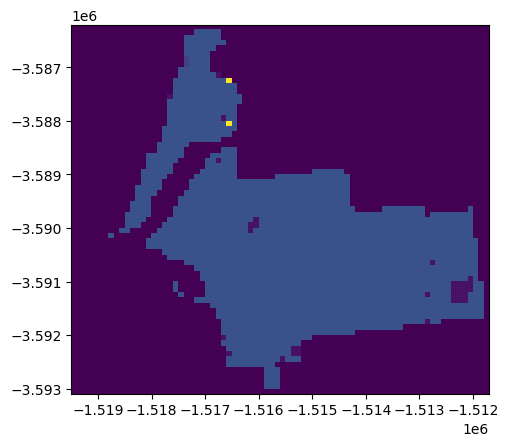

In [10]:
with rio.open(clipped_path) as src:
    show(src)

In [17]:
unique_values = np.unique(clipped_image)
print(unique_values)
print("Number of classes:", len(unique_values))

[ 0  5 19 25 99]
Number of classes: 5


https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#sphx-glr-users-explain-colors-colormap-manipulation-py

https://www.youtube.com/watch?v=1eYfoCtMmPY&t=187s

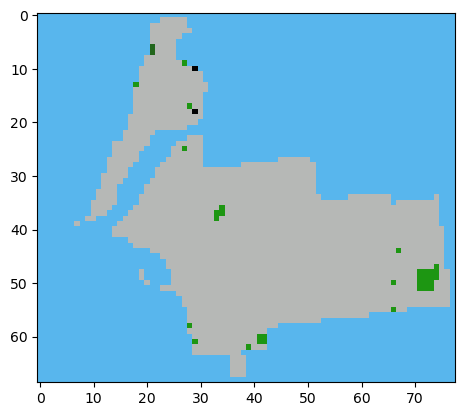

In [30]:
classes = np.array(unique_values)

custom_colours = [
    '#58b6ed', # 0 -- Not in the area
    '#1d9612', # 5 -- Eucalypt Woodlands
    '#22661c', # 19 -- Tussock Grasslands
    '#b6b8b6', # 25 -- Cleared, non-native vegetation, buildings
    '#020203' # 99 -- Unknown/no data
]
cmap = mcolors.ListedColormap(custom_colours)

boundaries = np.append(classes, classes[-1] + 1)
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

plt.imshow(clipped_image[0], cmap = cmap, norm = norm)

In [43]:
with rio.open(dem_path) as src:
    if gdf_perth.crs != src.crs:
        gdf_perth = gdf_perth.to_crs(src.crs)

    shapes = gdf_perth.geometry.values
    # print(shapes)
    clipped_image, clipped_image_transform = mask(src, shapes, crop = True)

    meta = src.meta.copy()
    meta.update({
        'height' : clipped_image.shape[1],
        'width' : clipped_image.shape[2],
        'transform' : clipped_image_transform
    })

    with rio.open(clipped_path, "w", **meta) as dst:
        dst.write(clipped_image)

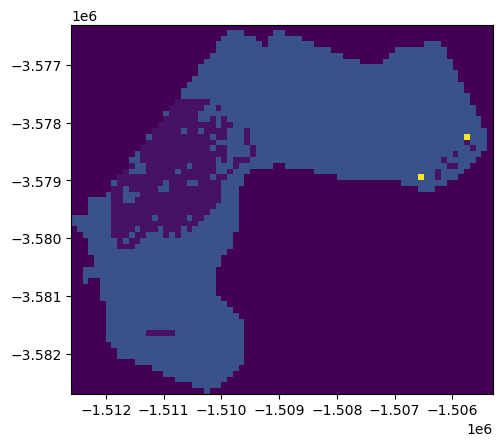

In [44]:
with rio.open(clipped_path) as src:
    show(src)

In [45]:
unique_values = np.unique(clipped_image)
print(unique_values)
print("Number of classes:", len(unique_values))

[ 0  5 25 99]
Number of classes: 4


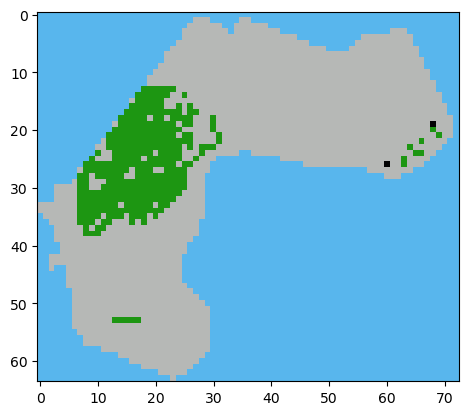

In [46]:
classes = np.array(unique_values)

custom_colours = [
    '#58b6ed', # 0 -- Not in the area
    '#1d9612', # 5 -- Eucalypt Woodlands
    '#b6b8b6', # 25 -- Cleared, non-native vegetation, buildings
    '#020203' # 99 -- Unknown/no data
]
cmap = mcolors.ListedColormap(custom_colours)

boundaries = np.append(classes, classes[-1] + 1)
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

plt.imshow(clipped_image[0], cmap = cmap, norm = norm)

In [55]:
with rio.open(dem_path) as src:
    if gdf_kalamunda.crs != src.crs:
        gdf_kalamunda = gdf_kalamunda.to_crs(src.crs)

    shapes = gdf_kalamunda.geometry.values
    # print(shapes)
    clipped_image, clipped_image_transform = mask(src, shapes, crop = True)

    meta = src.meta.copy()
    meta.update({
        'height' : clipped_image.shape[1],
        'width' : clipped_image.shape[2],
        'transform' : clipped_image_transform
    })

    with rio.open(clipped_path, "w", **meta) as dst:
        dst.write(clipped_image)

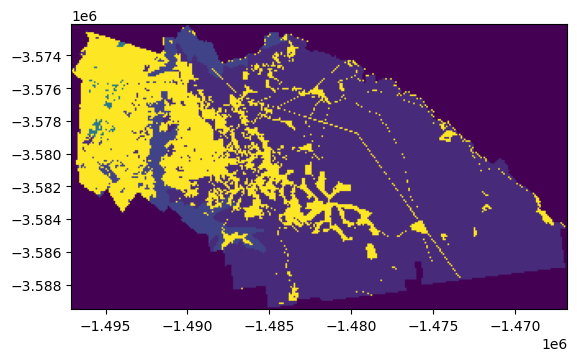

In [56]:
with rio.open(clipped_path) as src:
    show(src)

In [57]:
unique_values = np.unique(clipped_image)
print(unique_values)
print("Number of classes:", len(unique_values))

[ 0  3  5 10 25]
Number of classes: 5


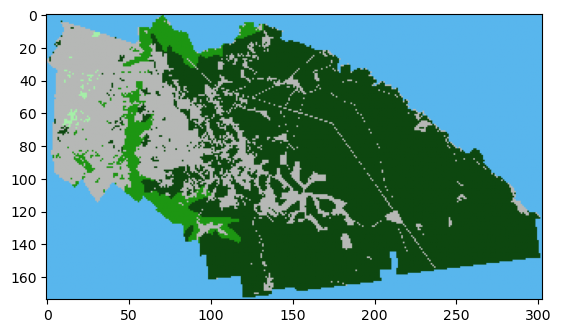

In [58]:
classes = np.array(unique_values)

custom_colours = [
    '#58b6ed', # 0 -- Not in the area
    '#0d470f', # 3 -- Eucalypt Open Forests
    '#1d9612', # 5 -- Eucalypt Woodlands
    '#a5f0a8', # 10 -- Other Forest and Woodland
    '#b6b8b6', # 25 -- Cleared, non-native vegetation, buildings
]
cmap = mcolors.ListedColormap(custom_colours)

boundaries = np.append(classes, classes[-1] + 1)
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

plt.imshow(clipped_image[0], cmap = cmap, norm = norm)